In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data=data.set_index('PassengerId')

In [6]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Density'>

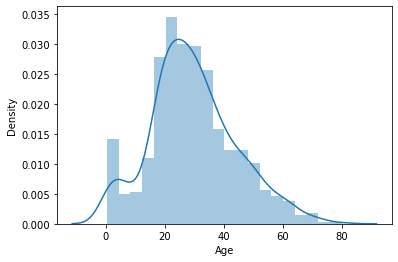

In [7]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

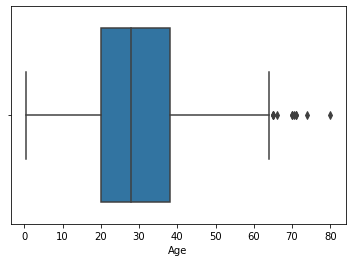

In [8]:
sns.boxplot(data['Age'])

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data.drop(['Cabin'],axis=1,inplace=True)

In [11]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].ffill())

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

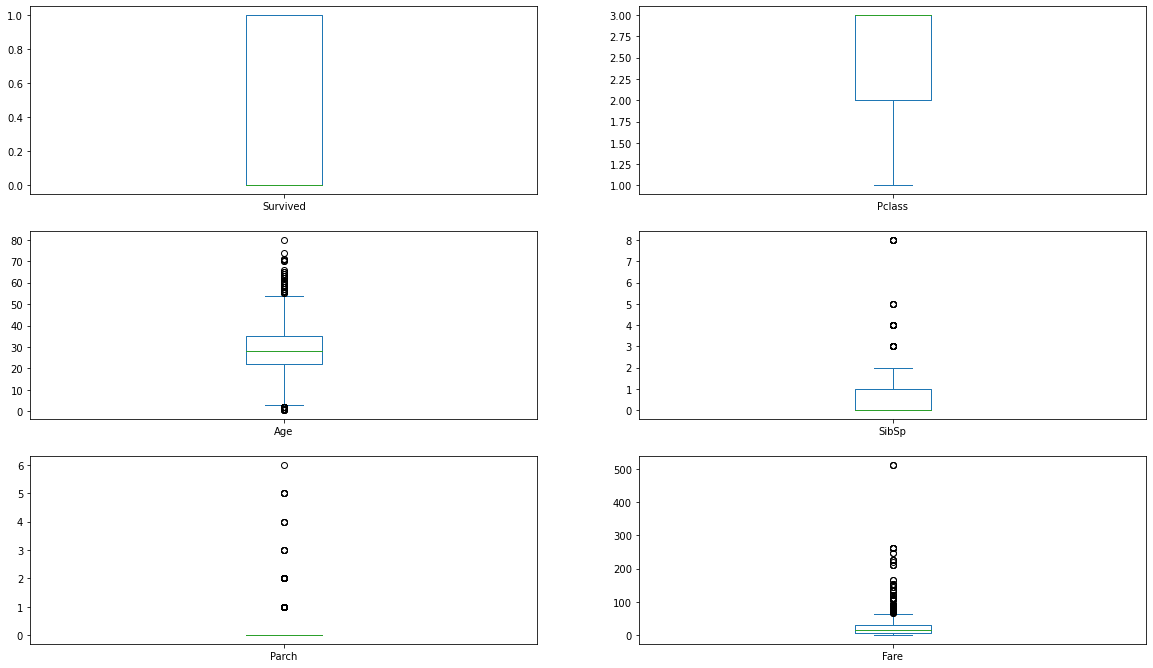

In [13]:
data.plot(kind='box',subplots=True,layout=(5,2),figsize=(20,20))
plt.show()

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [15]:
col=['Age', 'SibSp', 'Parch', 'Fare']

In [16]:
for x in col:
 Q1= np.percentile(data[x],25, interpolation='midpoint')
 Q2= np.percentile(data[x],50, interpolation='midpoint')
 Q3= np.percentile(data[x],75, interpolation='midpoint')
 IQR= Q3-Q1
 low_lim = Q1-1.5*IQR
 upp_lim = Q3+1.5*IQR
 ind1 = data[x]<low_lim
 data.drop(data.loc[ind1].index,inplace= True)
 ind2 = data[x]>upp_lim
 data.drop(data.loc[ind2].index,inplace= True)

In [17]:
data.nunique()

Survived      2
Pclass        3
Name        561
Sex           2
Age          55
SibSp         3
Parch         1
Ticket      520
Fare        144
Embarked      3
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Embarked']= le.fit_transform(data['Embarked'])

In [19]:
data= pd.get_dummies(data,columns=['Sex'],drop_first=True)

In [20]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,1
6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,1,1


In [21]:
x= data.iloc[:,[1,3,4,5,8,9]]
y= data['Survived']

In [22]:
data.shape

(561, 10)

In [23]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x= pd.DataFrame(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr_model= lr.fit(x_train,y_train)
y_pred_lr= lr_model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
confusion_matrix(y_test, y_pred_lr)

array([[71,  8],
       [11, 23]], dtype=int64)

In [27]:
f1_lr=f1_score(y_test, y_pred_lr)*100
f1_lr

70.76923076923077

In [28]:
acc_lr= accuracy_score(y_test, y_pred_lr)*100
acc_lr

83.1858407079646

#### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(2,15)
for i in neighbors:
    knn= KNeighborsClassifier(n_neighbors =i,metric='minkowski')
    knn_model= knn.fit(x_train, y_train)
    y_pred_knn= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_pred_knn)
    acc_values.append(acc)

In [30]:
acc_values

[0.7168141592920354,
 0.7522123893805309,
 0.7699115044247787,
 0.7876106194690266,
 0.7787610619469026,
 0.7699115044247787,
 0.7876106194690266,
 0.8053097345132744,
 0.8141592920353983,
 0.7964601769911505,
 0.7964601769911505,
 0.7964601769911505,
 0.8053097345132744]

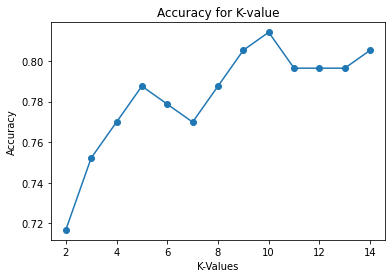

In [31]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [32]:
knn= KNeighborsClassifier(n_neighbors =10,metric='minkowski')
knn_model= knn.fit(x_train, y_train)
y_pred_knn= knn_model.predict(x_test)

In [33]:
f1_knn=f1_score(y_test, y_pred_knn)*100
f1_knn

63.1578947368421

In [34]:
acc_knn= accuracy_score(y_test, y_pred_knn)*100
acc_knn

81.41592920353983

In [35]:
confusion_matrix(y_test, y_pred_knn)

array([[74,  5],
       [16, 18]], dtype=int64)

#### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model= dt.fit(x_train,y_train)
y_pred_dt= dt_model.predict(x_test)

In [37]:
f1_dt=f1_score(y_test, y_pred_dt)*100
f1_dt

63.49206349206349

In [38]:
acc_dt= accuracy_score(y_test, y_pred_dt)*100
acc_dt

79.64601769911505

In [39]:
confusion_matrix(y_test, y_pred_dt)

array([[70,  9],
       [14, 20]], dtype=int64)

#### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(x_train,y_train)
y_pred_rfc=rfc_model.predict(x_test)

In [41]:
f1_rfc=f1_score(y_test, y_pred_rfc)*100
f1_rfc

63.49206349206349

In [42]:
acc_rfc= accuracy_score(y_test, y_pred_rfc)*100
acc_rfc

79.64601769911505

In [43]:
confusion_matrix(y_test, y_pred_rfc)

array([[70,  9],
       [14, 20]], dtype=int64)

#### Linear SVM

In [44]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_pred_lsvm= svm_model.predict(x_test)

In [45]:
acc_svm= accuracy_score(y_test,y_pred_lsvm)*100
f1_svm=f1_score(y_test,y_pred_lsvm)*100
confusion_matrix(y_test, y_pred_lsvm)

array([[72,  7],
       [12, 22]], dtype=int64)

In [46]:
acc_svm

83.1858407079646

In [47]:
f1_svm

69.84126984126983

#### Radial SVM

In [48]:
rsvm=SVC(kernel='rbf')
rsvm_model= rsvm.fit(x_train,y_train)
y_pred_rsvm= rsvm_model.predict(x_test)

In [49]:
acc_rsvm= accuracy_score(y_test,y_pred_rsvm)*100
f1_rsvm=f1_score(y_test,y_pred_rsvm)*100
confusion_matrix(y_test, y_pred_rsvm)

array([[72,  7],
       [13, 21]], dtype=int64)

#### Polynomial SVM

In [50]:
psvm=SVC(kernel='poly',degree=3)
psvm_model= psvm.fit(x_train,y_train)
y_pred_psvm= psvm_model.predict(x_test)

In [51]:
acc_psvm= accuracy_score(y_test,y_pred_psvm)*100
f1_psvm=f1_score(y_test,y_pred_psvm)*100
confusion_matrix(y_test, y_pred_psvm)

array([[73,  6],
       [13, 21]], dtype=int64)

#### Gaussian Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [53]:
acc_gnb= accuracy_score(y_test,y_pred_gnb)*100
f1_gnb=f1_score(y_test,y_pred_gnb)*100
confusion_matrix(y_test, y_pred_gnb)

array([[69, 10],
       [11, 23]], dtype=int64)

In [54]:
acc_gnb

81.41592920353983

In [55]:
f1_gnb

68.65671641791046

#### Bernoulli naive bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [57]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
f1_bnb=f1_score(y_test,y_pred_bnb)*100
confusion_matrix(y_test, y_pred_bnb)

array([[72,  7],
       [12, 22]], dtype=int64)

In [58]:
acc_bnb

83.1858407079646

In [59]:
f1_bnb

69.84126984126983

In [60]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'KNN',
              'Decision Tree',
              'Random Forest',
              'Linear SVM',
              'Radial SVM',
              'Polynomial SVM',
              'Gaussian Naive Bayes',
              'Bernoulli Naive Bayes'
              ],
    'f1-Score': [ f1_lr,
                      f1_knn, 
                      f1_dt,
                      f1_rfc,
                      f1_svm,
                      f1_rsvm,
                      f1_psvm,
                      f1_gnb,
                      f1_bnb],
    'Accuracy_score':[ acc_lr,
                      acc_knn, 
                      acc_dt,
                      acc_rfc,
                      acc_svm,
                      acc_rsvm,
                      acc_psvm,
                      acc_gnb,
                      acc_bnb
                     ]})

In [61]:
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df.reset_index(drop=True,inplace=True)
result_df.head(10)

,Model,f1-Score,Accuracy_score
0,Logistic Regression,70.769231,83.185841
1,Linear SVM,69.841270,83.185841
2,Polynomial SVM,68.852459,83.185841
3,Bernoulli Naive Bayes,69.841270,83.185841
4,Radial SVM,67.741935,82.300885
5,KNN,63.157895,81.415929
6,Gaussian Naive Bayes,68.656716,81.415929
7,Decision Tree,63.492063,79.646018
8,Random Forest,63.492063,79.646018


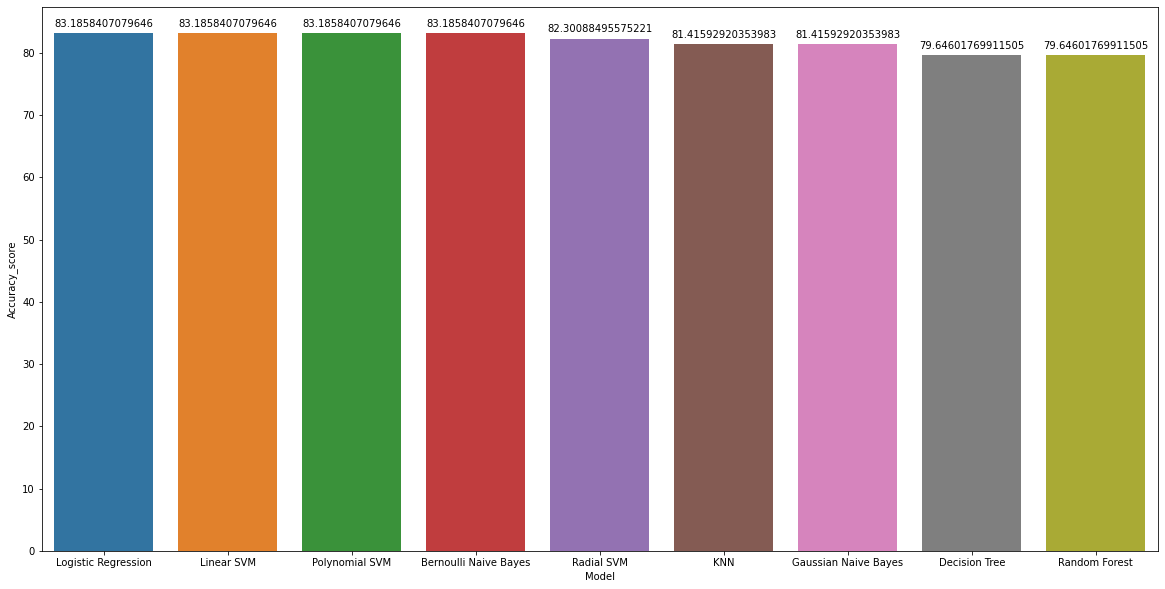

In [62]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='Model',y='Accuracy_score',data=result_df)
labels = (result_df['Accuracy_score'])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center')